In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
denuncias_policiales = pd.read_csv('DATASET_Denuncias_Policiales_Ene 2018 a Nov 2025.csv')
denuncias_policiales.head()

,ANIO,MES,DPTO_HECHO_NEW,PROV_HECHO,DIST_HECHO,UBIGEO_HECHO,P_MODALIDADES,cantidad
0,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Otros,6
1,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Violencia contra la mujer e integrantes,1
2,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Estafa,2
3,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Hurto,25
4,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Otros,64


In [3]:
# Mostrar resumen del dataset
def mostrar_resumen(df):
  print(f'\nCantidad de valores nulos:\n{df.isnull().sum()}')
  print(f'\nCantidad de duplicados:\n{df.duplicated().sum()}')
  print(f'\nTipos de datos:\n{df.dtypes}')
  print(f'\nMétricas estadísticas:\n{df.describe()}')
mostrar_resumen(denuncias_policiales)


Cantidad de valores nulos:
ANIO              0
MES               0
DPTO_HECHO_NEW    0
PROV_HECHO        0
DIST_HECHO        0
UBIGEO_HECHO      0
P_MODALIDADES     0
cantidad          0
dtype: int64

Cantidad de duplicados:
0

Tipos de datos:
ANIO               int64
MES                int64
DPTO_HECHO_NEW    object
PROV_HECHO        object
DIST_HECHO        object
UBIGEO_HECHO       int64
P_MODALIDADES     object
cantidad           int64
dtype: object

Métricas estadísticas:
                ANIO            MES   UBIGEO_HECHO       cantidad
count  340767.000000  340767.000000  340767.000000  340767.000000
mean     2021.728313       6.514789  117580.017314      19.847447
std         2.213319       3.429376   65484.067476      57.212556
min      2018.000000       1.000000   10101.000000       1.000000
25%      2020.000000       4.000000   60401.000000       1.000000
50%      2022.000000       7.000000  120415.000000       3.000000
75%      2024.000000       9.000000  150805.000000     

In [4]:
# Función para convertir el nombre de las columnas a snake_case
def convertir_a_snake_case(df):
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
  return df
convertir_a_snake_case(denuncias_policiales)
denuncias_policiales.head()

,anio,mes,dpto_hecho_new,prov_hecho,dist_hecho,ubigeo_hecho,p_modalidades,cantidad
0,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Otros,6
1,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Violencia contra la mujer e integrantes,1
2,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Estafa,2
3,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Hurto,25
4,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Otros,64


In [5]:
# Función para crear la columna fecha_denuncia
def columna_fecha_denuncia(df):
  df['fecha_denuncia'] = df['mes'].astype(str).str.zfill(2)+'-'+df['anio'].astype(str)
  df['fecha_denuncia'] = pd.to_datetime(df['fecha_denuncia'], format='%m-%Y').dt.to_period('M')
  return df
columna_fecha_denuncia(denuncias_policiales)
denuncias_policiales.head()

,anio,mes,dpto_hecho_new,prov_hecho,dist_hecho,ubigeo_hecho,p_modalidades,cantidad,fecha_denuncia
0,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Otros,6,2018-01
1,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Violencia contra la mujer e integrantes,1,2018-01
2,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Estafa,2,2018-01
3,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Hurto,25,2018-01
4,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Otros,64,2018-01


In [6]:
denuncias_policiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340767 entries, 0 to 340766
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype    
---  ------          --------------   -----    
 0   anio            340767 non-null  int64    
 1   mes             340767 non-null  int64    
 2   dpto_hecho_new  340767 non-null  object   
 3   prov_hecho      340767 non-null  object   
 4   dist_hecho      340767 non-null  object   
 5   ubigeo_hecho    340767 non-null  int64    
 6   p_modalidades   340767 non-null  object   
 7   cantidad        340767 non-null  int64    
 8   fecha_denuncia  340767 non-null  period[M]
dtypes: int64(4), object(4), period[M](1)
memory usage: 23.4+ MB


In [7]:
# Función para que el ubigeo tenga 6 dígitos
def ubigeo_update(df):
  df['ubigeo_hecho'] = df['ubigeo_hecho'].apply(lambda x: str(x).zfill(6))
  return df
ubigeo_update(denuncias_policiales)
denuncias_policiales.head(10)

,anio,mes,dpto_hecho_new,prov_hecho,dist_hecho,ubigeo_hecho,p_modalidades,cantidad,fecha_denuncia
0,2018,1,AMAZONAS,BAGUA,ARAMANGO,010202,Otros,6,2018-01
1,2018,1,AMAZONAS,BAGUA,ARAMANGO,010202,Violencia contra la mujer e integrantes,1,2018-01
2,2018,1,AMAZONAS,BAGUA,BAGUA,010201,Estafa,2,2018-01
3,2018,1,AMAZONAS,BAGUA,BAGUA,010201,Hurto,25,2018-01
4,2018,1,AMAZONAS,BAGUA,BAGUA,010201,Otros,64,2018-01
5,2018,1,AMAZONAS,BAGUA,BAGUA,010201,Robo,7,2018-01
6,2018,1,AMAZONAS,BAGUA,BAGUA,010201,Violencia contra la mujer e integrantes,8,2018-01
7,2018,1,AMAZONAS,BAGUA,COPALLIN,010203,Otros,4,2018-01
8,2018,1,AMAZONAS,BAGUA,COPALLIN,010203,Violencia contra la mujer e integrantes,1,2018-01
9,2018,1,AMAZONAS,BAGUA,IMAZA,010205,Hurto,1,2018-01


In [8]:
# Función para corregir los nombres de los departamentos, distritos y provincias
columnas = ['dpto_hecho_new', 'prov_hecho', 'dist_hecho']
def corregir_nombres(df, columns):
  excepciones = {
      r'\bY\b':'y',
      r'\bDe\b':'de',
      r'\bDel\b':'del',
      r'\bDe La\b':'de la',
      r'\bDe Los\b':'de los'
  }
  for col in columns:
    df[col] = df[col].astype(str).str.title()
    for patron, reemplazo in excepciones.items():
      df[col] = df[col].str.replace(patron, reemplazo, regex=True)
  return df
corregir_nombres(denuncias_policiales, columnas)
denuncias_policiales.head(10)

,anio,mes,dpto_hecho_new,prov_hecho,dist_hecho,ubigeo_hecho,p_modalidades,cantidad,fecha_denuncia
0,2018,1,Amazonas,Bagua,Aramango,010202,Otros,6,2018-01
1,2018,1,Amazonas,Bagua,Aramango,010202,Violencia contra la mujer e integrantes,1,2018-01
2,2018,1,Amazonas,Bagua,Bagua,010201,Estafa,2,2018-01
3,2018,1,Amazonas,Bagua,Bagua,010201,Hurto,25,2018-01
4,2018,1,Amazonas,Bagua,Bagua,010201,Otros,64,2018-01
5,2018,1,Amazonas,Bagua,Bagua,010201,Robo,7,2018-01
6,2018,1,Amazonas,Bagua,Bagua,010201,Violencia contra la mujer e integrantes,8,2018-01
7,2018,1,Amazonas,Bagua,Copallin,010203,Otros,4,2018-01
8,2018,1,Amazonas,Bagua,Copallin,010203,Violencia contra la mujer e integrantes,1,2018-01
9,2018,1,Amazonas,Bagua,Imaza,010205,Hurto,1,2018-01


In [9]:
# Tabla para linea mensual de denuncias
df_lineal_mensual = denuncias_policiales.groupby('fecha_denuncia')['cantidad'].sum().reset_index()
df_lineal_mensual

,fecha_denuncia,cantidad
0,2018-01,60098
1,2018-02,59096
2,2018-03,66438
3,2018-04,63854
4,2018-05,63560
...,...,...
90,2025-07,71908
91,2025-08,71483
92,2025-09,69992
93,2025-10,70908


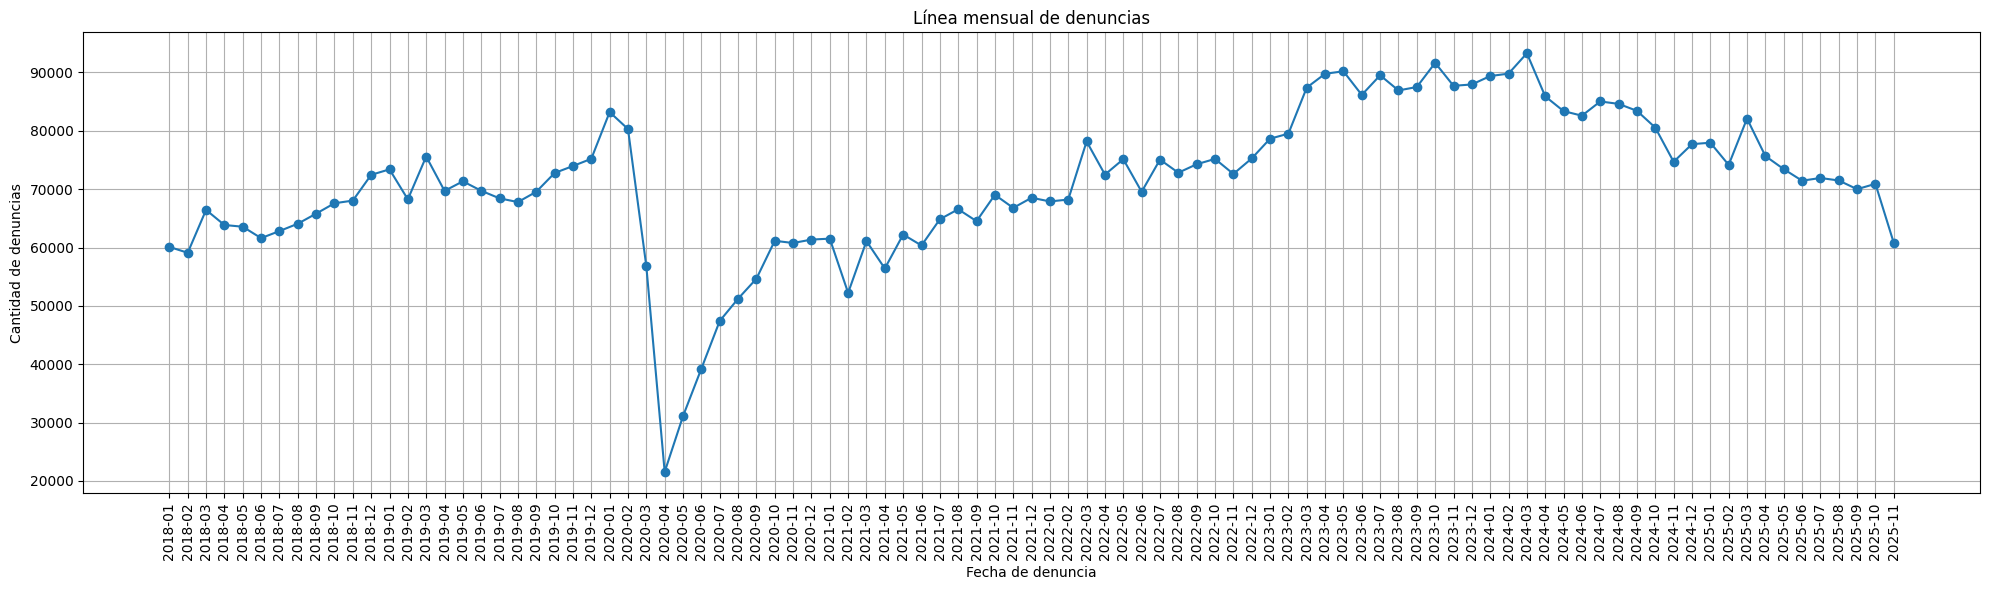

In [10]:
# Función para graficar la linea mensual de denuncias
def graficar_lineal_mensual(df):
  fig, ax = plt.subplots(figsize=(20, 6))
  ax.plot(df['fecha_denuncia'].astype(str), df['cantidad'], marker='o')

  ax.set_xlabel('Fecha de denuncia')
  ax.set_ylabel('Cantidad de denuncias')
  ax.set_title('Línea mensual de denuncias')
  ax.grid(True)
  plt.xticks(rotation = 90)
  plt.tight_layout()
  plt.show()
graficar_lineal_mensual(df_lineal_mensual)

Entre 2018 y 2019 las denuncias se mantienen relativamente estables (60 - 75 mil); en abril de 2020 ocurre una caída abrupta con posterior recuperación gradul durante 2020 y 2021; en 2022 y 2023 se analiza un crecimiento sostenido con picos cercanos a 90 - 95 mil; y en 2024 se presenta un descenso continuo.

In [11]:
# Tabla para Línea mensual por año
df_lineal_anio = denuncias_policiales.groupby(['anio', 'mes'])['cantidad'].sum().reset_index()
df_lineal_anio_pivot = df_lineal_anio.pivot(index='mes', columns='anio', values='cantidad').fillna(0).sort_index()
df_lineal_anio_pivot

anio,2018,2019,2020,2021,2022,2023,2024,2025
mes,,,,,,,,
1,60098.0,73387.0,83201.0,61517.0,67893.0,78641.0,89374.0,77955.0
2,59096.0,68247.0,80300.0,52226.0,68214.0,79503.0,89789.0,74151.0
3,66438.0,75590.0,56779.0,61093.0,78169.0,87396.0,93277.0,82088.0
4,63854.0,69700.0,21553.0,56403.0,72491.0,89766.0,85894.0,75673.0
5,63560.0,71337.0,31113.0,62225.0,75131.0,90189.0,83367.0,73431.0
6,61606.0,69722.0,39243.0,60347.0,69545.0,86142.0,82582.0,71445.0
7,62817.0,68419.0,47409.0,64835.0,75057.0,89504.0,85019.0,71908.0
8,64073.0,67784.0,51223.0,66554.0,72811.0,86908.0,84607.0,71483.0
9,65801.0,69548.0,54655.0,64513.0,74265.0,87496.0,83414.0,69992.0


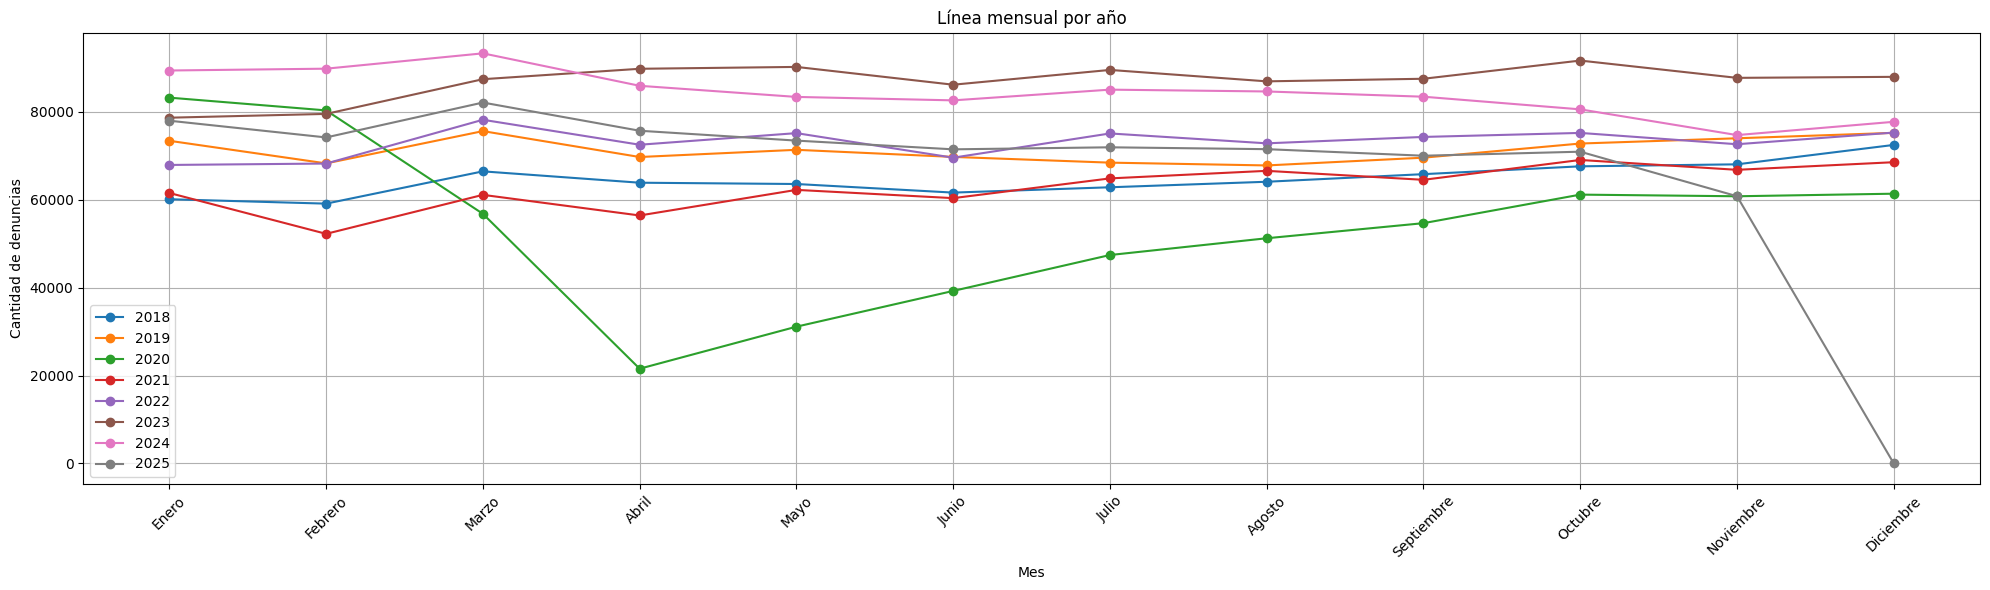

In [12]:
# Función para graficar Línea mensual por año
def graficar_lineal_anio(df):
  fig, ax = plt.subplots(figsize=(20, 6))
  meses = range(1,13)
  nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
  for col in df.columns:
    ax.plot(meses, df[col], marker='o', label=col)
  ax.set_xlabel('Mes')
  ax.set_ylabel('Cantidad de denuncias')
  ax.set_title('Línea mensual por año')
  ax.grid(True)
  ax.set_xticks(meses)
  ax.set_xticklabels(nombres_meses, rotation=45)
  ax.legend()
  plt.tight_layout()
  plt.show()
graficar_lineal_anio(df_lineal_anio_pivot)

El gráfico compara meses entre años y muestra que 2023 es el nivel más alto y estable (picos en octubre–diciembre), 2024 se mantiene alto pero levemente por debajo, 2018 y 2019 operan en un rango menor de 60 a 75 mil, 2021 y 2022 son intermedios, y 2020 presenta una caída pronunciada desde abril con recuperación progresiva; en 2025 hay valores moderados al inicio y cero desde septiembre debido a la falta de datos.

In [13]:
# Tabla para Heatmap Año × Mes
df_heatmap_anip_mes = denuncias_policiales.groupby(['anio', 'mes'])['cantidad'].sum().reset_index()
df_heatmap_anip_mes_pivot = df_heatmap_anip_mes.pivot(index='anio', columns='mes', values='cantidad').fillna(0).sort_index()
df_heatmap_anip_mes_pivot

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2018,60098.0,59096.0,66438.0,63854.0,63560.0,61606.0,62817.0,64073.0,65801.0,67581.0,68035.0,72449.0
2019,73387.0,68247.0,75590.0,69700.0,71337.0,69722.0,68419.0,67784.0,69548.0,72765.0,73959.0,75196.0
2020,83201.0,80300.0,56779.0,21553.0,31113.0,39243.0,47409.0,51223.0,54655.0,61146.0,60771.0,61357.0
2021,61517.0,52226.0,61093.0,56403.0,62225.0,60347.0,64835.0,66554.0,64513.0,69028.0,66786.0,68519.0
2022,67893.0,68214.0,78169.0,72491.0,75131.0,69545.0,75057.0,72811.0,74265.0,75178.0,72605.0,75257.0
2023,78641.0,79503.0,87396.0,89766.0,90189.0,86142.0,89504.0,86908.0,87496.0,91634.0,87702.0,87931.0
2024,89374.0,89789.0,93277.0,85894.0,83367.0,82582.0,85019.0,84607.0,83414.0,80538.0,74686.0,77705.0
2025,77955.0,74151.0,82088.0,75673.0,73431.0,71445.0,71908.0,71483.0,69992.0,70908.0,60783.0,0.0


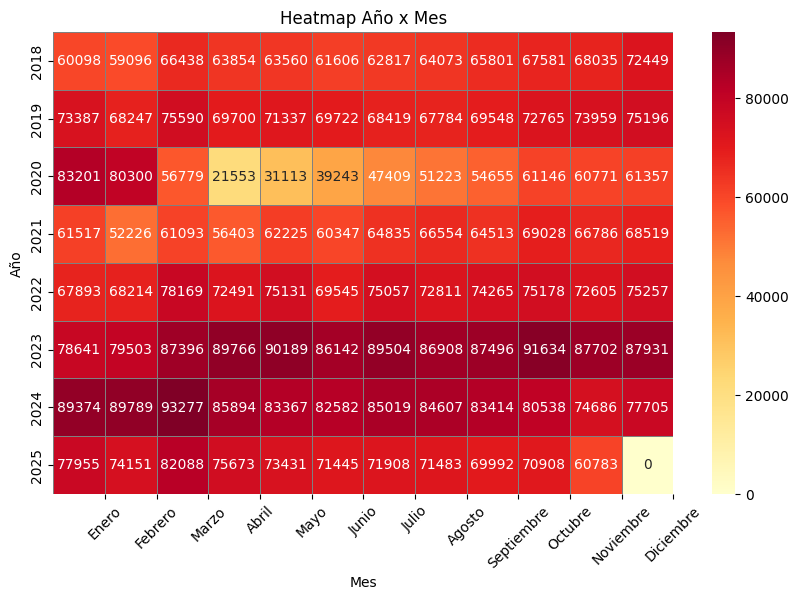

In [14]:
# Función para graficar Heatmap Año × Mes
def graficar_heatmap_anio_mes(df):
  meses = range(1,13)
  nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
  plt.figure(figsize=(10, 6))
  sns.heatmap(data=df, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, linecolor='gray')
  plt.xlabel('Mes')
  plt.ylabel('Año')
  plt.xticks(ticks=meses, labels=nombres_meses, rotation=45)
  plt.title('Heatmap Año x Mes')
  plt.show()
graficar_heatmap_anio_mes(df_heatmap_anip_mes_pivot)

In [15]:
# Tabla para Barras horizontales: Top modalidades
df_top_modalidades = denuncias_policiales.groupby('p_modalidades')['cantidad'].sum().reset_index().sort_values(by='cantidad', ascending=False)
df_top_modalidades

,p_modalidades,cantidad
4,Otros,2576047
6,Violencia contra la mujer e integrantes,1791253
3,Hurto,1353534
5,Robo,734874
0,Estafa,192238
1,Extorsión,101236
2,Homicidio,14173


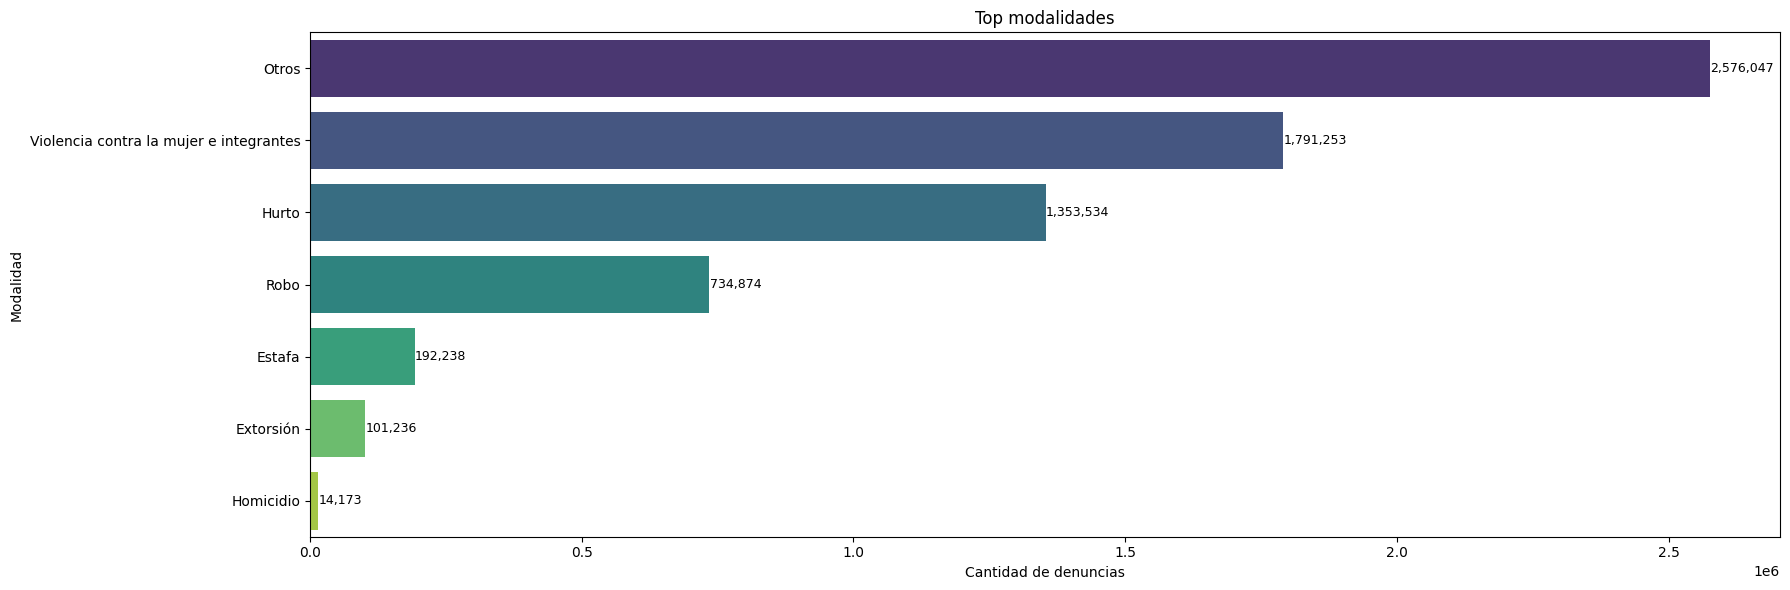

In [16]:
# Función para graficar Barras horizontales: Top modalidades
def graficar_top_modalidades(df):
  fig, ax = plt.subplots(figsize=(18, 6))
  ax = sns.barplot(data=df, x='cantidad', y='p_modalidades', palette='viridis')

  # Poner etiquetas de datos
  for i, barra in enumerate(ax.patches):
    x_pos = barra.get_width()
    y_pos = barra.get_y() + barra.get_height() / 2
    ax.text(x_pos + 1000, y_pos, f'{int(x_pos):,}', ha='left', va='center', fontsize=9)

  ax.set_xlabel('Cantidad de denuncias')
  ax.set_ylabel('Modalidad')
  ax.set_title('Top modalidades')
  plt.tight_layout()
  plt.show()
graficar_top_modalidades(df_top_modalidades)

Las denuncias están altamente concentradas, en donde “Otros” lidera con 2,487,554 casos (38%), seguido por Violencia contra la mujer e integrantes con 1,736,924 denuncias (26.5%), Hurto que posee 1,308,967 casos (20%) y Robo con 719,220 registros(11%); muy por detrás aparecen Estafa con 181,041 casos (2.8%), Extorsión que presenta 94,372 registros (1.4%) y por último Homicidio que expone 13,535 denuncias (0.2%).

In [17]:
# Total de denuncias
total_denuncias = denuncias_policiales['cantidad'].sum()
print(f'Total de denuncias: {total_denuncias}')

Total de denuncias: 6763355


In [18]:
# Porcentaje de cada modalidad
porcentaje_modalidades = denuncias_policiales.groupby('p_modalidades')['cantidad'].sum()
porcentaje_modalidades.div(total_denuncias).mul(100).round(2)

,cantidad
p_modalidades,
Estafa,2.84
Extorsión,1.50
Homicidio,0.21
Hurto,20.01
Otros,38.09
Robo,10.87
Violencia contra la mujer e integrantes,26.48


In [19]:
# Tabla para Área apilada 100% por modalidad (en el tiempo) — evolución del mix.
df_modalidad_tiempo = denuncias_policiales.groupby(['anio', 'p_modalidades'])['cantidad'].sum().reset_index()
df_modalidad_tiempo_pivot = df_modalidad_tiempo.pivot(index='anio', columns='p_modalidades', values='cantidad')
df_modalidad_tiempo_pivot

p_modalidades,Estafa,Extorsión,Homicidio,Hurto,Otros,Robo,Violencia contra la mujer e integrantes
anio,,,,,,,
2018,9555,3225,1076,162380,351675,103135,144362
2019,12172,3865,1114,166717,378959,102524,190303
2020,14024,2837,1168,104127,224389,51858,250347
2021,20684,4735,1577,134199,268569,66223,258059
2022,26777,16345,1883,171475,322665,90047,247424
2023,34085,22674,2336,232391,344718,150395,256213
2024,39882,22359,2568,221558,367362,112571,243952
2025,35059,25196,2451,160687,317710,58121,200593


In [20]:
# Normalizar a porcentajes (100%)
df_modalidad_tiempo_pivot_pct = df_modalidad_tiempo_pivot.div(df_modalidad_tiempo_pivot.sum(axis=1), axis=0)*100
df_modalidad_tiempo_pivot_pct

p_modalidades,Estafa,Extorsión,Homicidio,Hurto,Otros,Robo,Violencia contra la mujer e integrantes
anio,,,,,,,
2018,1.232255,0.415910,0.138766,20.941234,45.353543,13.300740,18.617554
2019,1.422538,0.451701,0.130193,19.484161,44.288813,11.981946,22.240649
2020,2.161696,0.437303,0.180039,16.050405,34.587900,7.993526,38.589133
2021,2.743069,0.627946,0.209138,17.797190,35.617058,8.782355,34.223244
2022,3.054587,1.864556,0.214803,19.561016,36.808021,10.272115,28.224901
2023,3.268566,2.174313,0.224010,22.285033,33.056582,14.422063,24.569433
2024,3.947728,2.213210,0.254194,21.930964,36.363402,11.142863,24.147638
2025,4.383378,3.150221,0.306445,20.090471,39.722837,7.266787,25.079862


In [21]:
# Tabla para Barras: Top 10 departamentos
df_top_departamentos = denuncias_policiales.groupby('dpto_hecho_new')['cantidad'].sum().reset_index().sort_values(by='cantidad', ascending=False).head(10)
df_top_departamentos

,dpto_hecho_new,cantidad
13,Lima Metropolitana,2378617
3,Arequipa,470831
12,Lambayeque,393181
11,La Libertad,353634
18,Piura,340820
10,Junin,280204
6,Cusco,275648
19,Prov. Const. del Callao,257328
9,Ica,244586
1,Ancash,224808


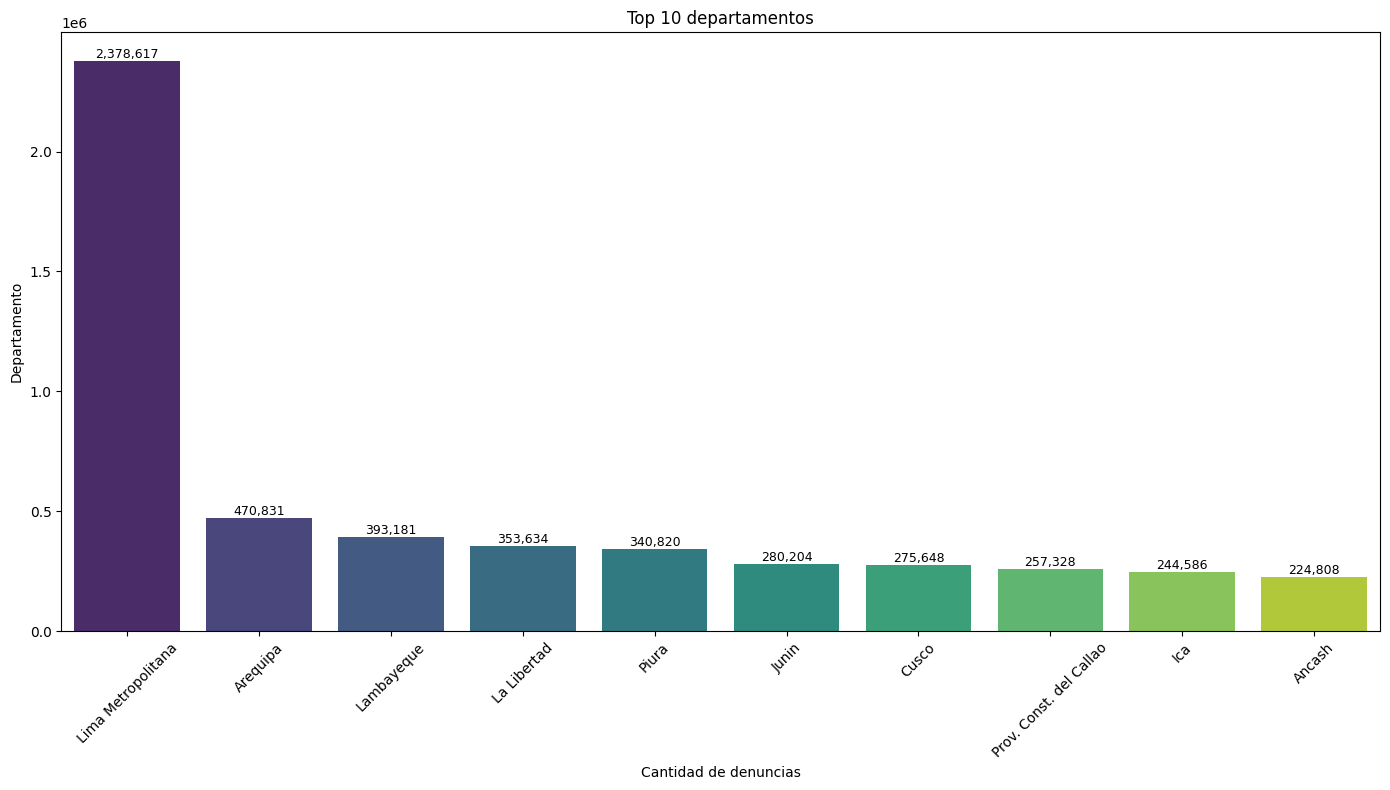

In [22]:
# Función para graficar Barras: Top 10 departamentos
def graficar_top_departamentos(df):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax = sns.barplot(data=df, x='dpto_hecho_new', y='cantidad', palette='viridis')

  # Poner etiquetas de datos
  for i, barra in enumerate(ax.patches):
    x_pos = barra.get_x() + barra.get_width() / 2
    y_pos = barra.get_height()
    ax.text(x_pos, y_pos + 1000, f'{int(y_pos):,}', ha='center', va='bottom', fontsize=9)

  ax.set_xlabel('Cantidad de denuncias')
  ax.set_ylabel('Departamento')
  ax.set_title('Top 10 departamentos')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
graficar_top_departamentos(df_top_departamentos)

El Top 10 por departamento está fuertemente dominado por Lima Metropolitana, con 2,297,873 denuncias (35%); muy por detrás aparecen Arequipa (456,625; 7%), Lambayeque (378,252; 5.8%), La Libertad (342,094; 5.2%), Piura (330,894; 5.1%), Junín (272,126; 4.2%), Cusco (266,419; 4.1%), Prov. Const. del Callao (250,238; 3.8%), Ica (236,335; 3.6%) y Áncash (217,780; 3.3%). En conjunto, estos diez concentran 77% de las denuncias.

In [23]:
# Porcentaje de cada modalidad
porcentaje_departamentos = denuncias_policiales.groupby('dpto_hecho_new')['cantidad'].sum().sort_values(ascending=False)
porcentaje_departamentos.div(total_denuncias).mul(100).round(2)

,cantidad
dpto_hecho_new,
Lima Metropolitana,35.17
Arequipa,6.96
Lambayeque,5.81
La Libertad,5.23
Piura,5.04
Junin,4.14
Cusco,4.08
Prov. Const. del Callao,3.80
Ica,3.62


In [25]:
# Tabla para Control chart mensual — meses anómalos.
df_chart_mensual = denuncias_policiales.groupby('fecha_denuncia')['cantidad'].sum().reset_index()
df_chart_mensual

,fecha_denuncia,cantidad
0,2018-01,60098
1,2018-02,59096
2,2018-03,66438
3,2018-04,63854
4,2018-05,63560
...,...,...
90,2025-07,71908
91,2025-08,71483
92,2025-09,69992
93,2025-10,70908


In [26]:
# Calcular media y desviación estandar
media = df_chart_mensual['cantidad'].mean()
desviacion_estandar = df_chart_mensual['cantidad'].std()
print(f'Media: {media}')
print(f'Desviación estándar: {desviacion_estandar}')

Media: 71193.21052631579
Desviación estándar: 12569.159201804772


In [27]:
# Límites de control
df_chart_mensual['lim_inf'] = media - 2 * desviacion_estandar
df_chart_mensual['lim_sup'] = media + 2 * desviacion_estandar

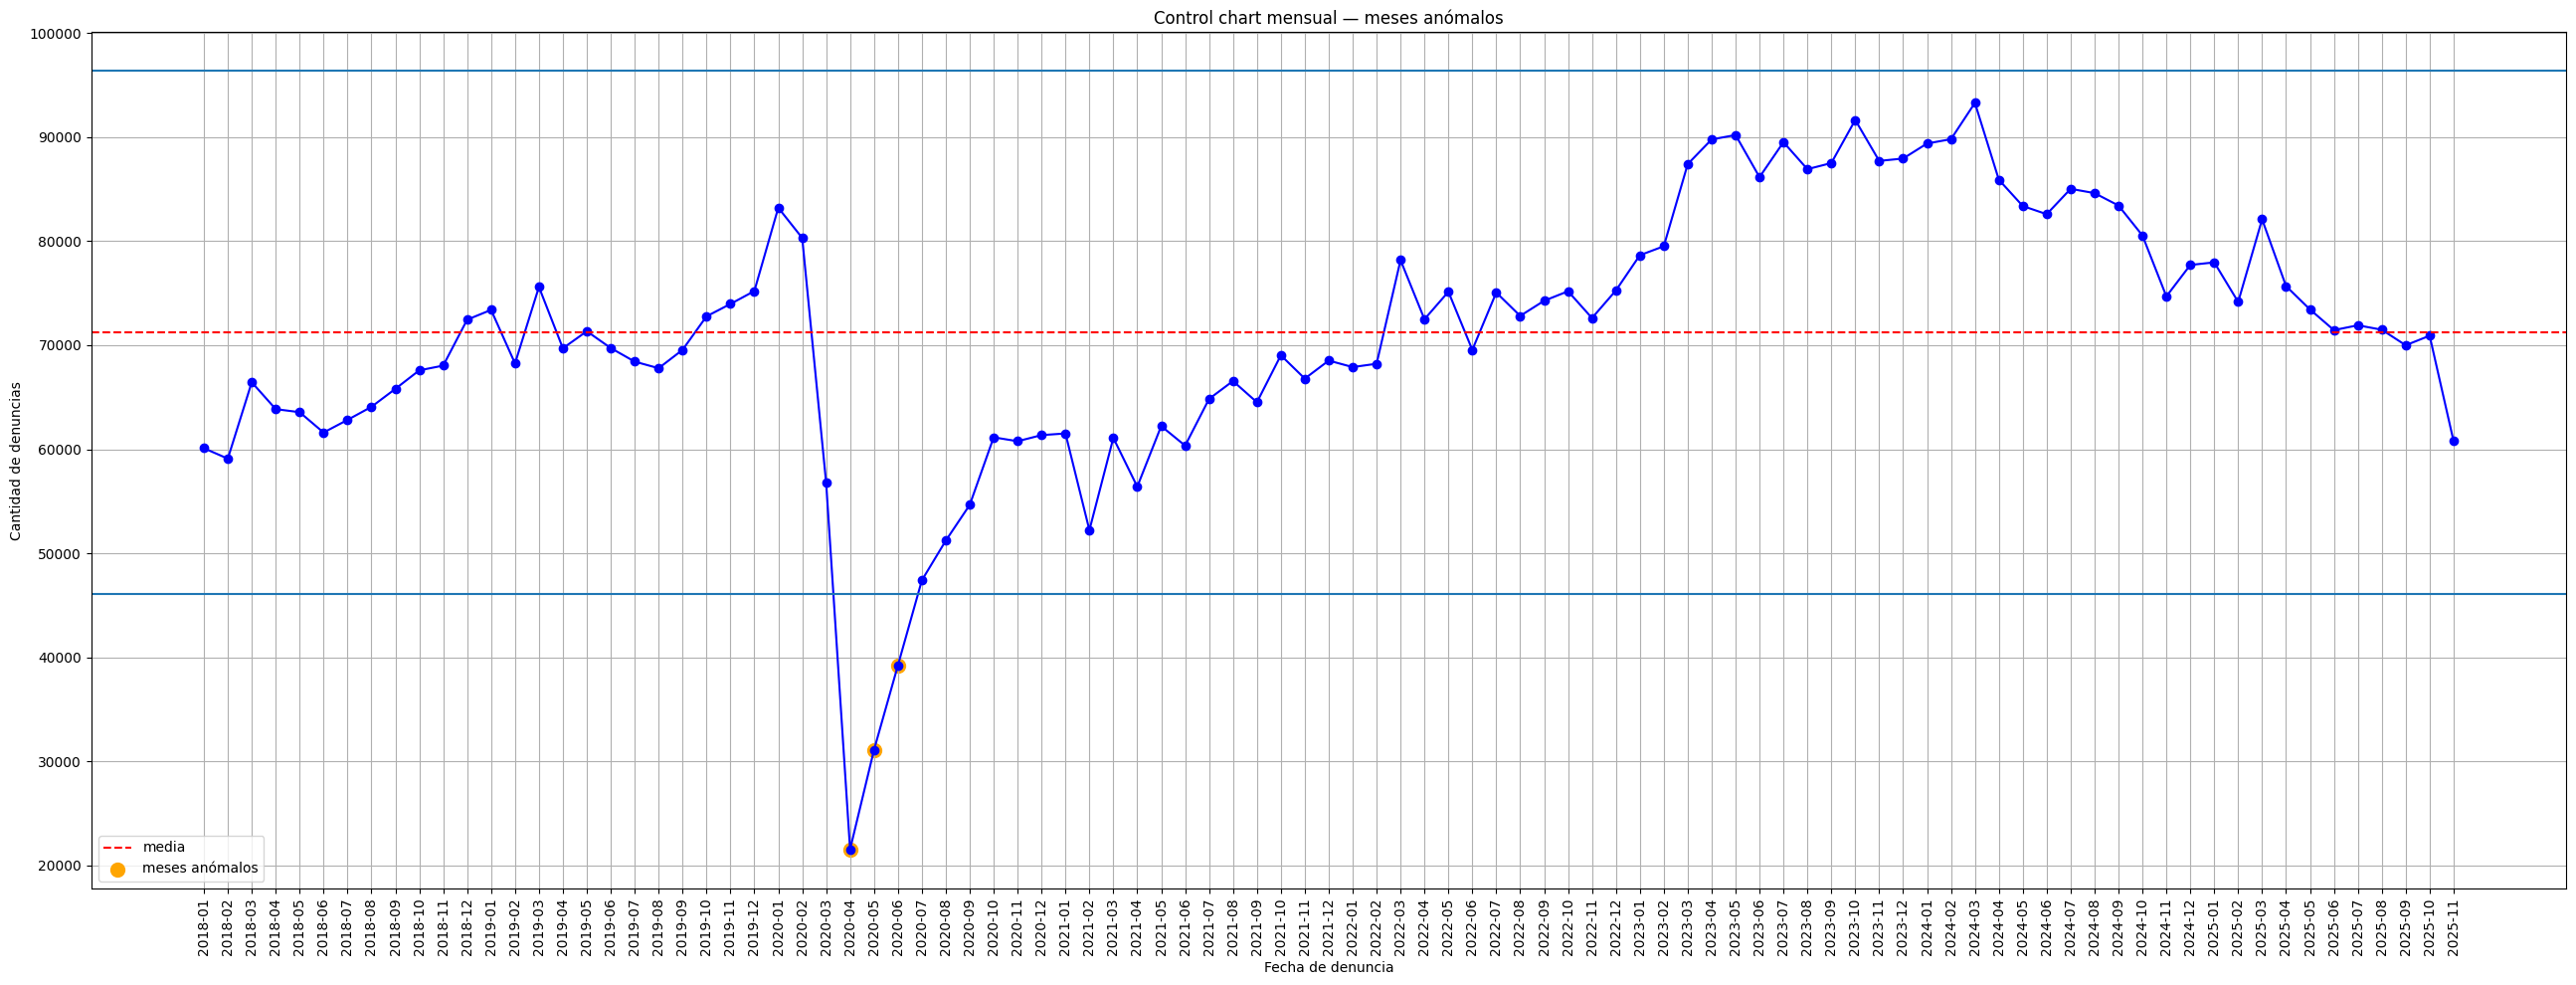

In [28]:
# Función para graficar Control chart mensual — meses anómalos.
def graficar_chart_mensual(df, media, std):
  fig, ax = plt.subplots(figsize=(26, 10))
  ax.plot(df['fecha_denuncia'].astype(str), df['cantidad'], marker='o', color='blue')
  # Línea de media
  ax.axhline(media, color='red', linestyle='--', label='media')
  # Línea de control superior
  ax.axhline(media + 2 * std)
  # Línea de control inferior
  ax.axhline(media - 2 * std)
  # Resaltar meses anómalos
  anomalos = df[(df['cantidad'] > media + 2 * std)|(df['cantidad'] < media - 2 * std)]
  ax.scatter(anomalos['fecha_denuncia'].astype(str), anomalos['cantidad'], color = 'orange', s=100, label='meses anómalos')
  ax.set_title('Control chart mensual — meses anómalos')
  ax.set_xlabel('Fecha de denuncia')
  ax.set_ylabel('Cantidad de denuncias')
  ax.legend()
  ax.grid(True)
  plt.xticks(rotation = 90)
  plt.tight_layout()
  plt.show()
graficar_chart_mensual(df_chart_mensual, media, desviacion_estandar)

El control chart muestra una serie estable con un único quiebre fuerte: la media es 71,104 y la desviación estándar 12,747, por lo que los límites de ±2σ se ubican en 45,610 (inferior) y 96,599 (superior); abril, mayo y junio de 2020 caen por debajo del límite inferior (meses anómalos) eso sugiere una causa especial, probablemente vinculada a factores externos como cierre de comisarías o menor capacidad de reporte durante la pandemia. En otras palabras, no implican necesariamente menos delitos, sino menos denuncias registradas por condiciones extraordinarias; mientras que el resto del periodo se mantiene dentro de control, con alza en 2022 y 2023 que roza el techo y luego descenso en 2024–2025 hacia valores cercanos o por debajo de la media.

In [29]:
# Tabla para Small multiples (mini-gráficos) de las 6 modalidades principales por departamento
top_modalidades = denuncias_policiales['p_modalidades'].value_counts().nlargest(6).index.tolist()
top_modalidades

['Otros',
 'Violencia contra la mujer e integrantes',
 'Hurto',
 'Robo',
 'Estafa',
 'Extorsión']

In [30]:
df_top = denuncias_policiales[denuncias_policiales['p_modalidades'].isin(top_modalidades)]
df_top

,anio,mes,dpto_hecho_new,prov_hecho,dist_hecho,ubigeo_hecho,p_modalidades,cantidad,fecha_denuncia,ubigeo_dpto
0,2018,1,Amazonas,Bagua,Aramango,010202,Otros,6,2018-01,01
1,2018,1,Amazonas,Bagua,Aramango,010202,Violencia contra la mujer e integrantes,1,2018-01,01
2,2018,1,Amazonas,Bagua,Bagua,010201,Estafa,2,2018-01,01
3,2018,1,Amazonas,Bagua,Bagua,010201,Hurto,25,2018-01,01
4,2018,1,Amazonas,Bagua,Bagua,010201,Otros,64,2018-01,01
...,...,...,...,...,...,...,...,...,...,...
340762,2025,11,Ucayali,Padre Abad,Padre Abad,250301,Violencia contra la mujer e integrantes,1,2025-11,25
340763,2025,11,Ucayali,Purus,Purus,250401,Estafa,2,2025-11,25
340764,2025,11,Ucayali,Purus,Purus,250401,Hurto,1,2025-11,25
340765,2025,11,Ucayali,Purus,Purus,250401,Otros,1,2025-11,25


In [31]:
df_top_agrupado = df_top.groupby(['p_modalidades', 'dpto_hecho_new'])['cantidad'].sum().reset_index()
df_top_agrupado

,p_modalidades,dpto_hecho_new,cantidad
0,Estafa,Amazonas,2042
1,Estafa,Ancash,5623
2,Estafa,Apurimac,1876
3,Estafa,Arequipa,12554
4,Estafa,Ayacucho,3151
...,...,...,...
151,Violencia contra la mujer e integrantes,Region Lima,56555
152,Violencia contra la mujer e integrantes,San Martin,39064
153,Violencia contra la mujer e integrantes,Tacna,27365
154,Violencia contra la mujer e integrantes,Tumbes,15480


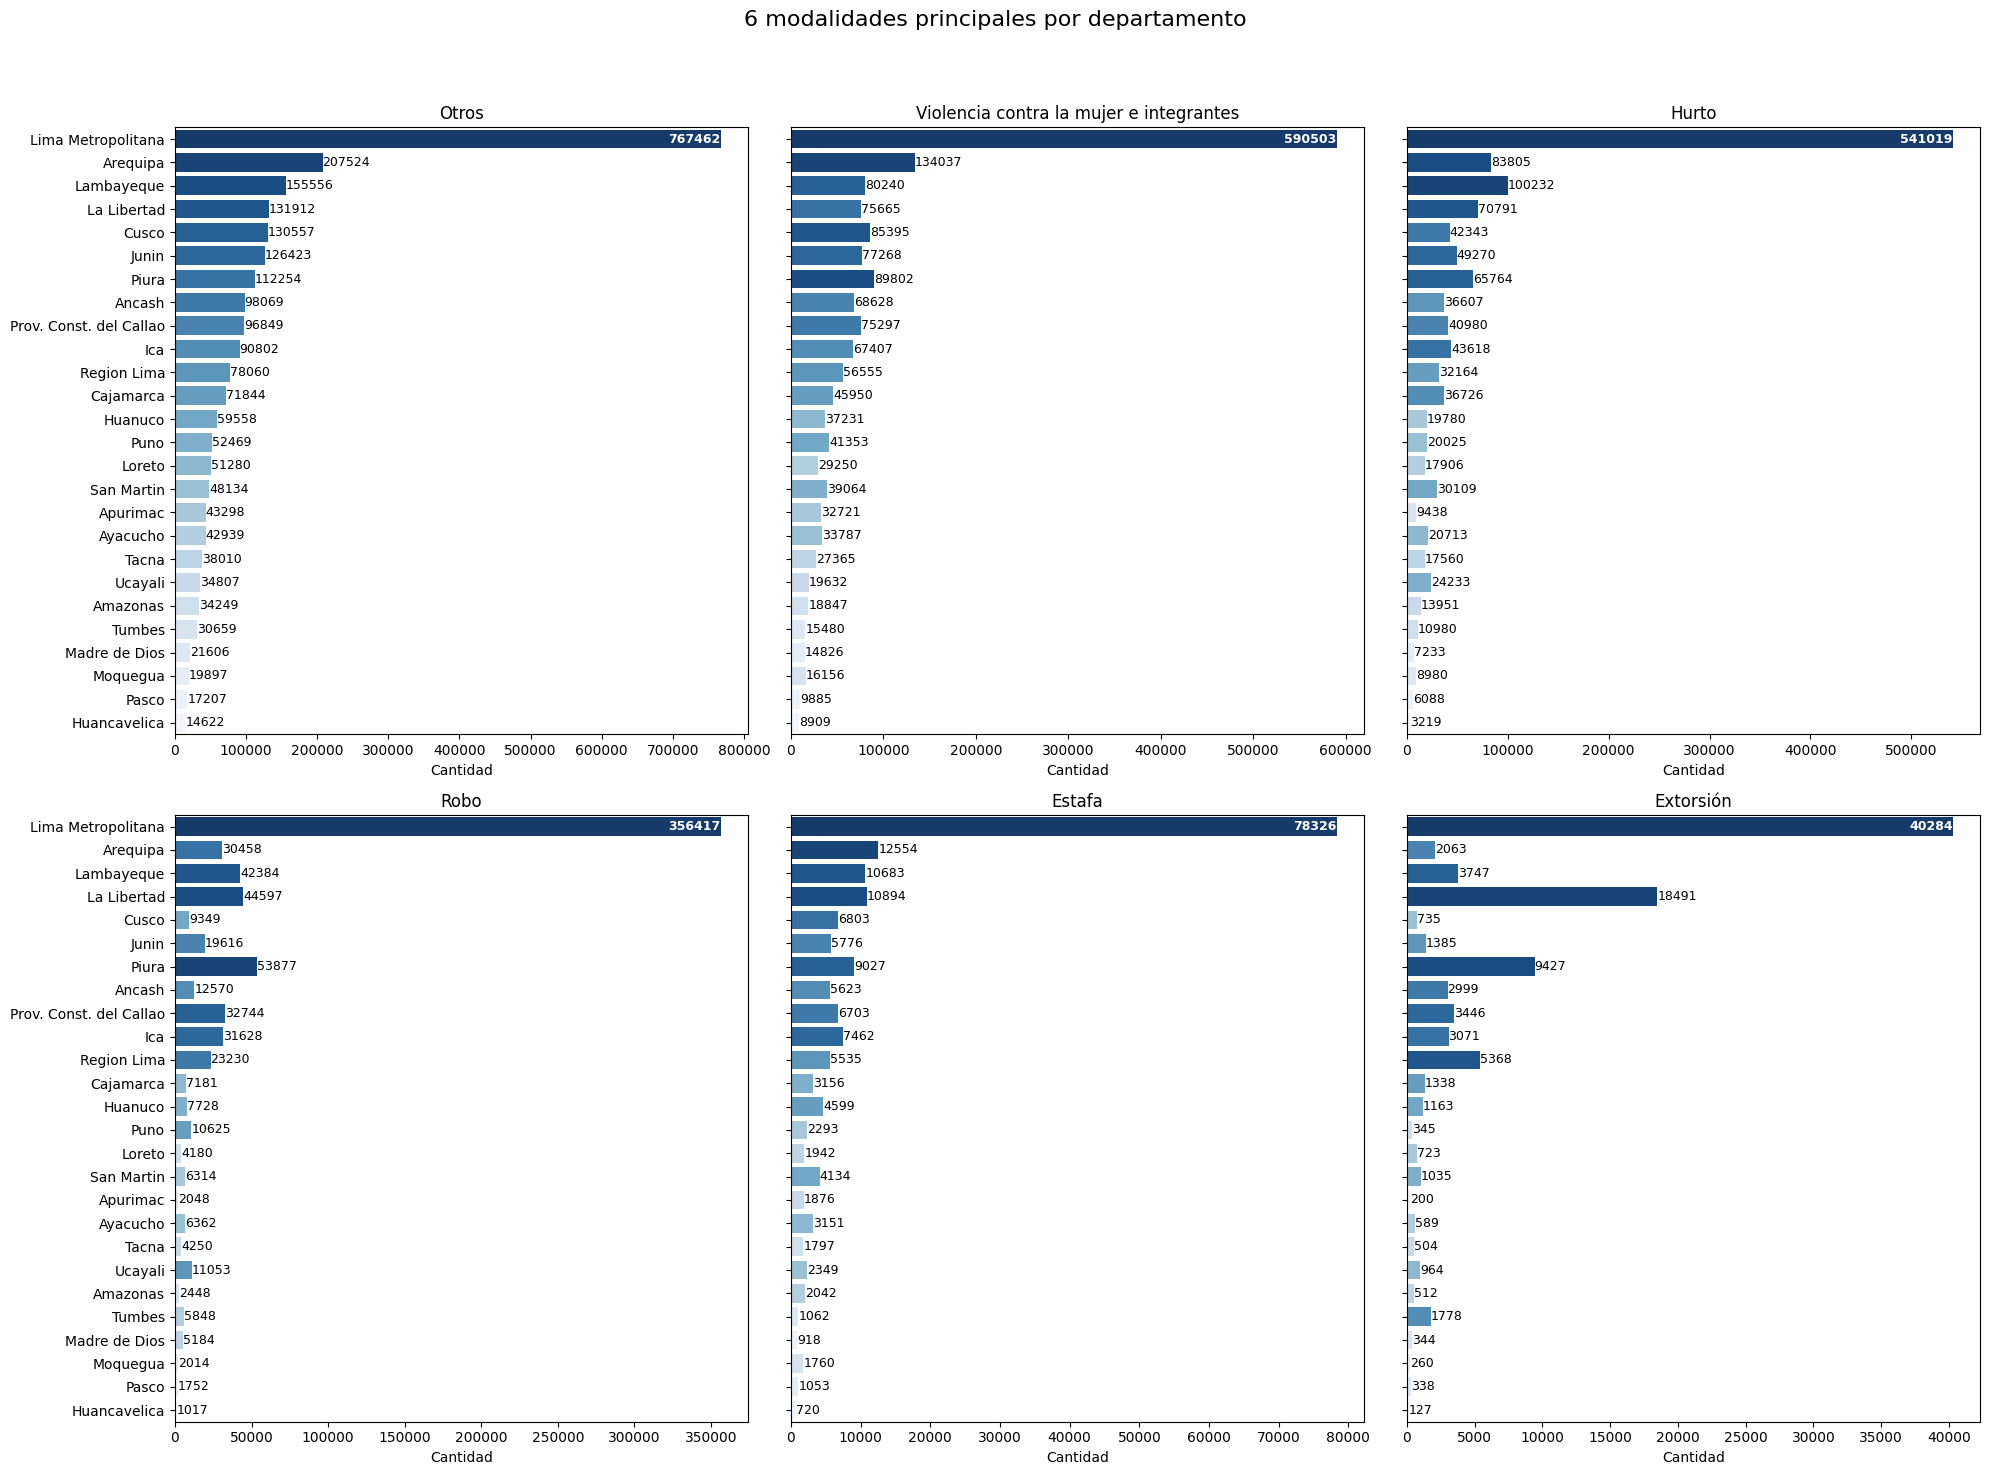

In [32]:
# Función para graficar Small multiples (mini-gráficos) de las 6 modalidades principales por departamento
def graficar_top_modalidades_departamento(df):
  fig, axes = plt.subplots(2,3, figsize=(20, 15), sharey=True)
  axes = axes.flatten()
  for i, modalidad in enumerate(top_modalidades):
    df_top_modalidad = df[df['p_modalidades']==modalidad].sort_values('cantidad', ascending=False)
    ax = axes[i]
    sns.barplot(data=df_top_modalidad, x='cantidad', y='dpto_hecho_new', ax=axes[i], palette='Blues_r')
    axes[i].set_title(modalidad, fontsize=12)
    axes[i].set_xlabel('Cantidad')
    axes[i].set_ylabel('')
    #Etiquetas de datos
    for p in ax.patches:
      ancho = p.get_width()
      y = p.get_y() + p.get_height() / 2
      idx = ax.patches.index(p)
      nombre_dpto = df_top_modalidad.iloc[idx]["dpto_hecho_new"]

      if nombre_dpto == "Lima Metropolitana":
        ax.text(ancho - 5, y, f"{int(ancho)}", va='center', ha='right', fontsize=9, color='white', fontweight='bold')
      else:
        ax.text(ancho + 1, y, f"{int(ancho)}", va='center', fontsize=9, color='black')

  fig.suptitle('6 modalidades principales por departamento', fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()
graficar_top_modalidades_departamento(df_top_agrupado)